# Experiment with configs

Provides a way to analyse csv produced by experiment script from the main repo.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

df = pd.read_csv('../experiments/analysis/experiments-results.csv')

## Helper functionality

In [40]:
configs = df['Config'].unique()
configs.sort()

problems = df['Problem'].unique()
problems.sort()

versions = df['Version'].unique()
versions.sort()

def extract_columns(df, version, config, problem, target_columns):
    """
    Extracts columns data for specific version, config and problem
    """
    if config == None:
        column = df.loc[(df['Problem'] == problem) & (df['Version'] == version) ]
    elif version == None:
        column = df.loc[(df['Config'] == config) & (df['Problem'] == problem)]
    else:
        column = df.loc[(df['Config'] == config) & (df['Problem'] == problem) & (df['Version'] == version) ]
    
    column = column[target_columns].reset_index(drop=True)

    return column

def visualize_catplot_with_config(config, x_column):
    """
    Visualizes data using catplot for given config using given column name
    """
    for problem in problems:
        columns = []

        for version in versions:
            column = extract_columns(df, version = version, config = config, problem = problem, 
                                    target_columns = [x_column, 'Version'])
            columns.append(column)
    
        sns.catplot(x = x_column, y = 'Version', data=pd.concat(columns), kind ='box', height=4, aspect=3)
        plt.title(problem)

def visualize_lmplot_with_config(config, x_column, y_column):
    """
    Visualizes data using lmplot for given config using given column names
    """
    for problem in problems:
        columns = []
        
        for version in versions:
            column = extract_columns(df, version = version, config = config, problem = problem, 
                                    target_columns = [y_column, x_column])
            column['Version'] = version
            columns.append(column)   
        

        sns.lmplot(x=x_column, y=y_column, data=pd.concat(columns), fit_reg=False, hue='Version', height=4, aspect=3)
        plt.title(problem)


## Cost variation per version

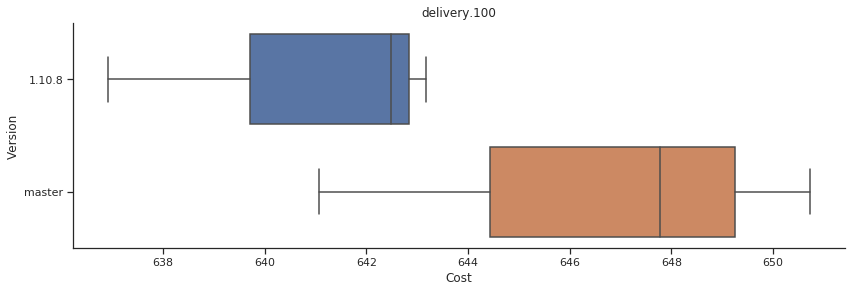

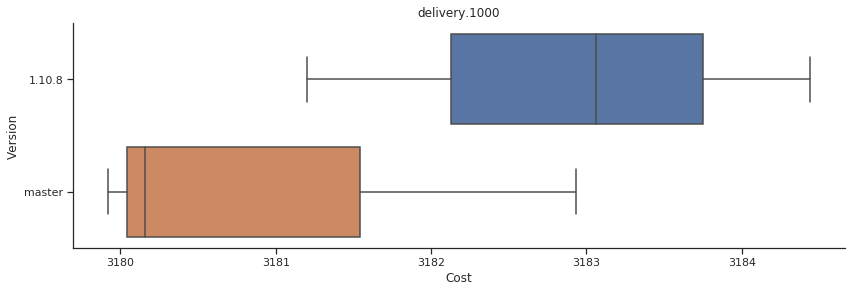

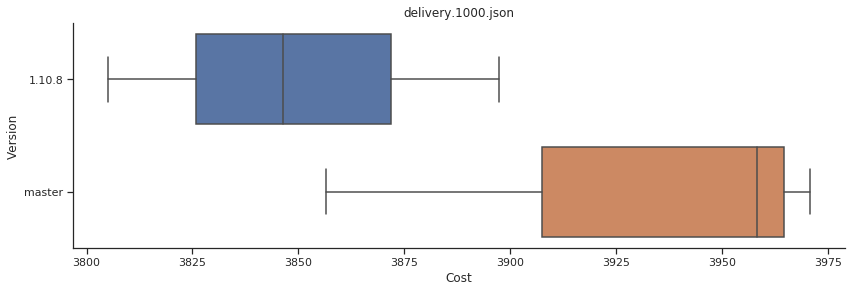

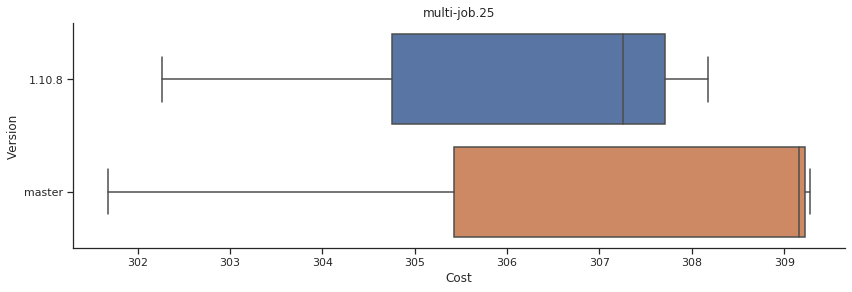

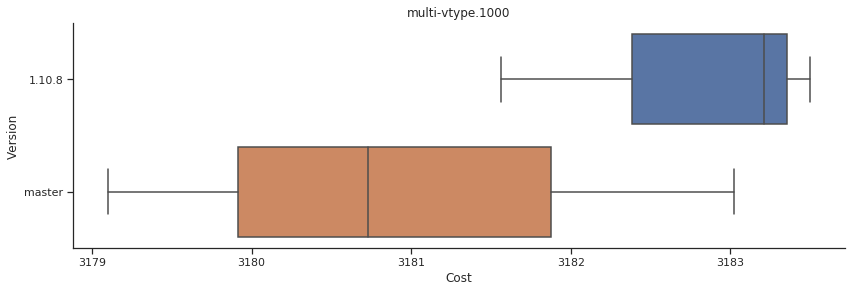

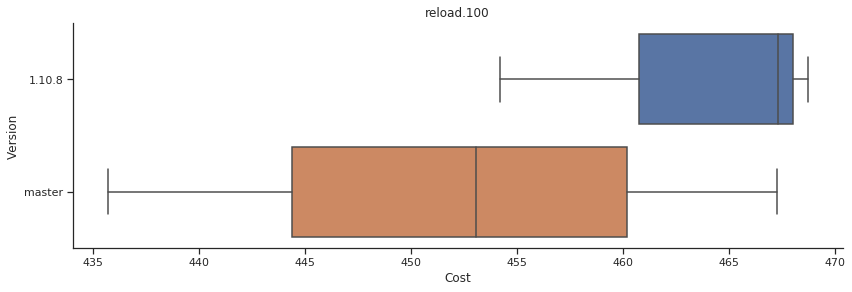

In [41]:
visualize_catplot_with_config(config = None, x_column = 'Cost')

## Tours variation per version

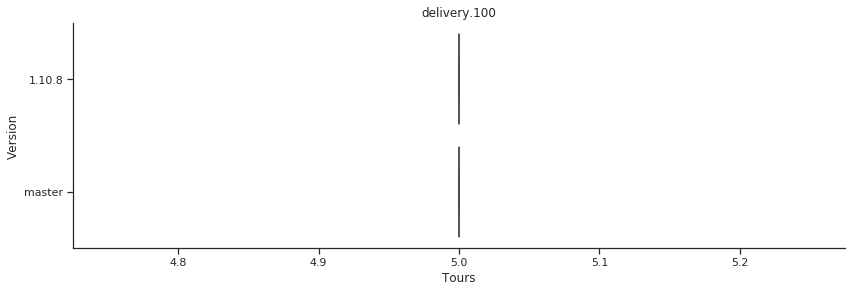

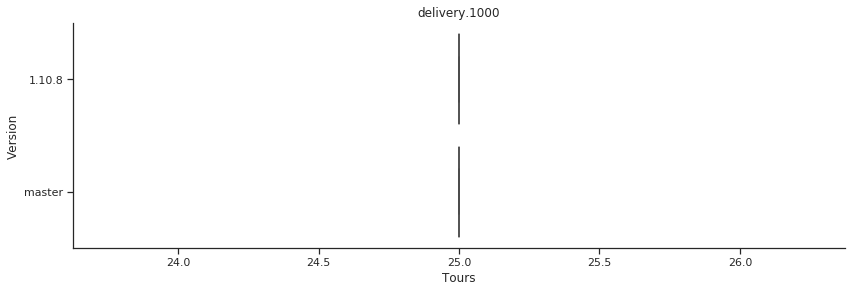

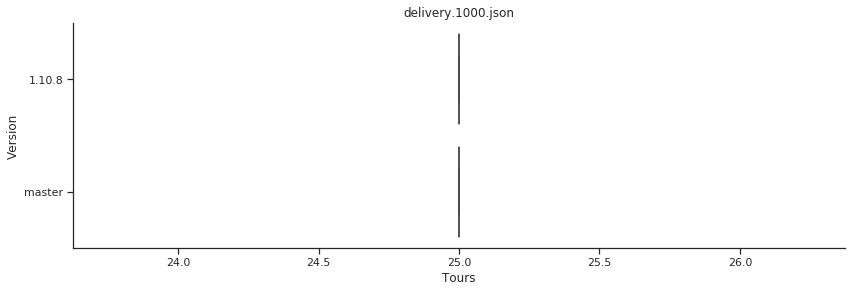

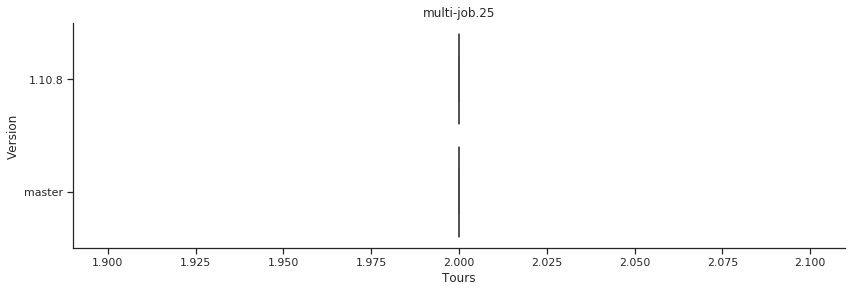

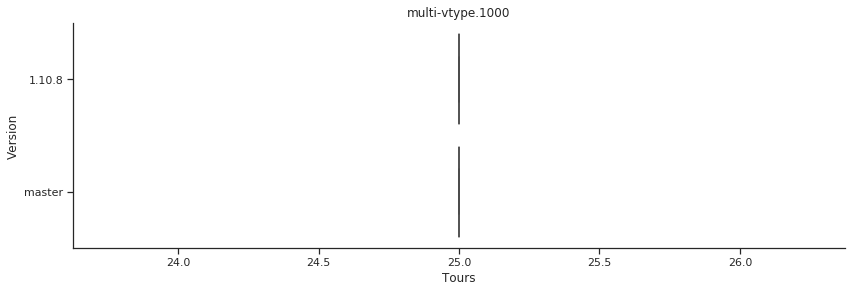

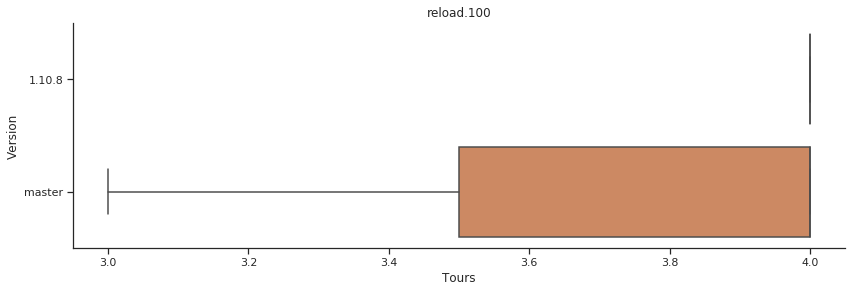

In [42]:
visualize_catplot_with_config(config = None, x_column = 'Tours')

## Cost vs Duration per version

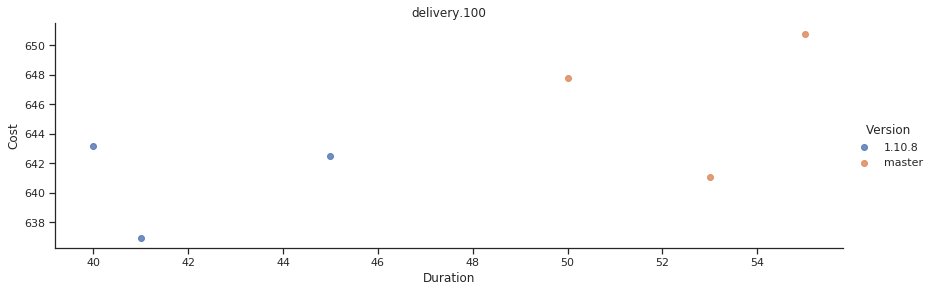

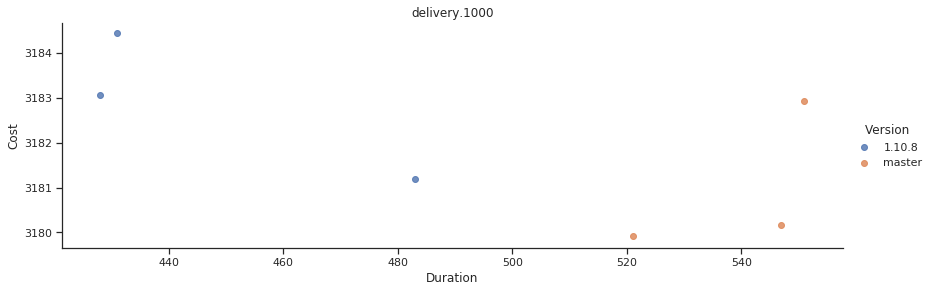

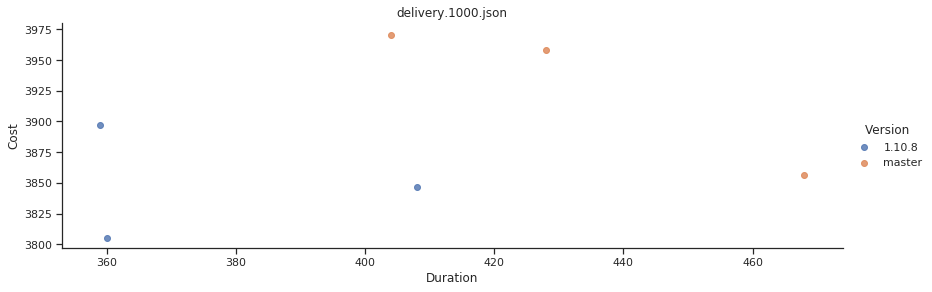

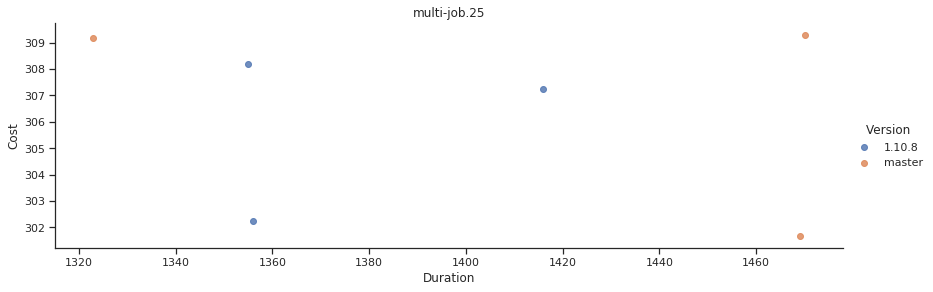

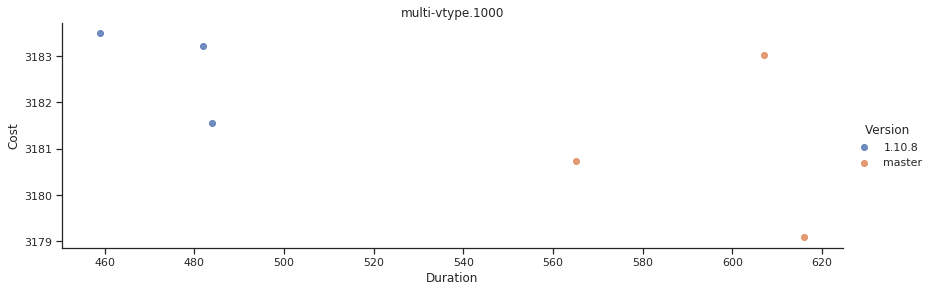

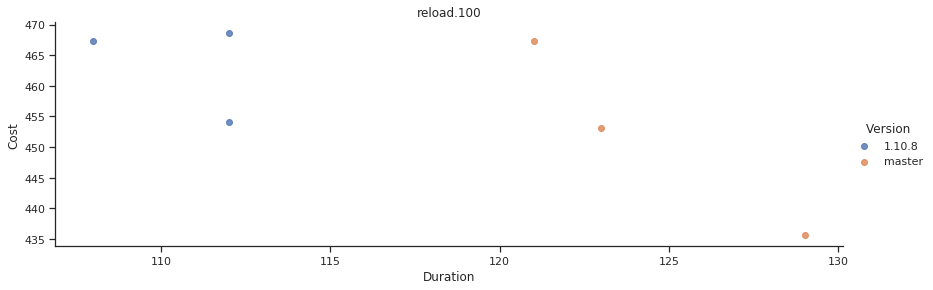

In [43]:
visualize_lmplot_with_config(config = None, x_column='Duration', y_column='Cost')

## Cost vs Generations per version

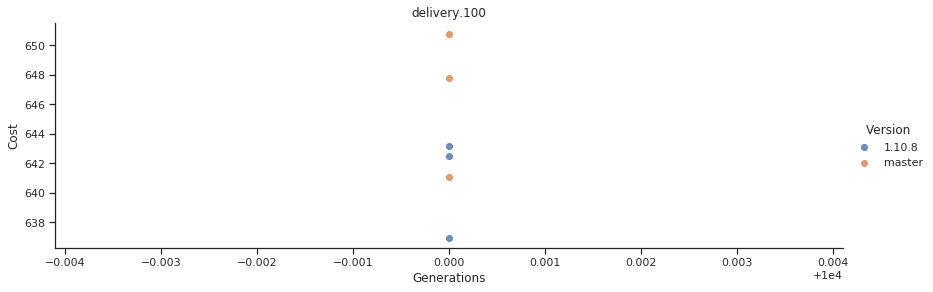

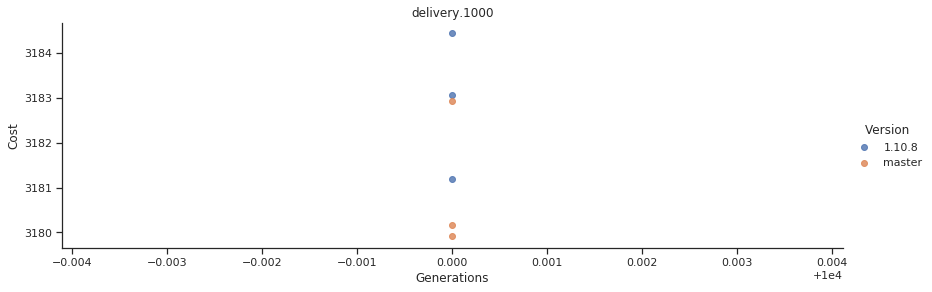

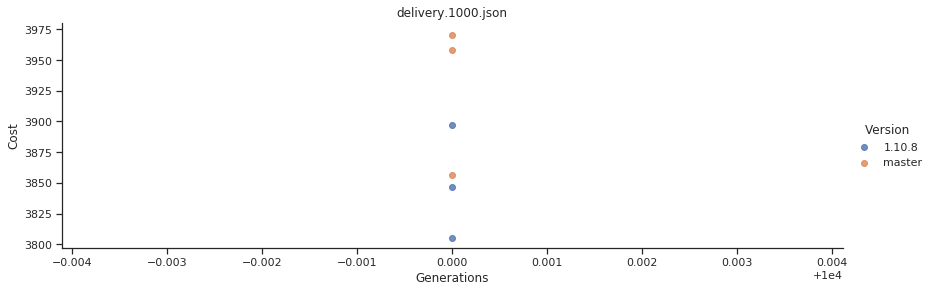

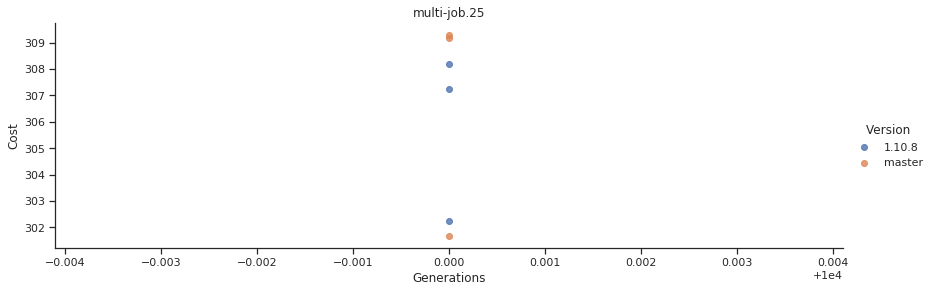

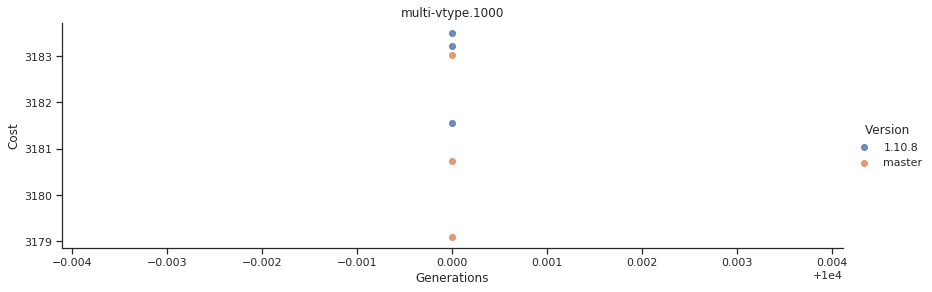

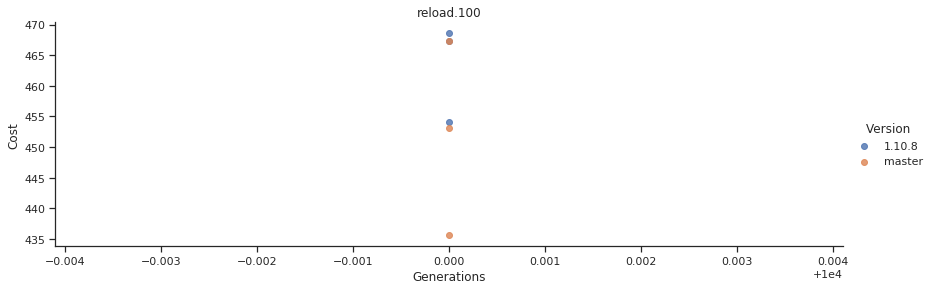

In [44]:
visualize_lmplot_with_config(config = None, x_column='Generations', y_column='Cost')